### LSE Data Analytics Online Career Accelerator 
# Course 301: Advanced Analytics for Organisational Impact

## Practical activity: Completing a what-if scenario analysis

**This is the solution to the activity.**

You’re working at a financial analysis firm that specialises in risk management to support clients' stock trading. To help a client make an investment decision, you have been asked to run return-on-investment (ROI) scenarios. The client asks for ROI on its investment over the next six years, and you have been given the following inputs:
- Number of shares: 500
- Buying price per share: 10
- Annual dividends: 500
- Selling price: 15
- Other annual costs: 125
- Target annualised ROI: 7.5% 
- Annualised $ROI = [(1+(ROI)^{(1/n)}-1] ×100%$

Using these inputs, you need to calculate ROI for the six years that the investor intends to hold on to their stock, and then run a what-if analysis using different values as inputs to mimic a good or bad economy for the client’s investment.

## 1. Prepare your workstation

In [4]:
# Import the necessary libraries.
import pandas as pd
import random
import matplotlib.pyplot as plt
from dataclasses import dataclass
from sensitivity import SensitivityAnalyzer

import warnings
warnings.filterwarnings(action='ignore')

## 2. Specify the model inputs and create a class

In [5]:
# Create a class and instance.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 10
    dividend: int = 500
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()

# View the output.
model_data

ModelInputs(share_no=500, buying_price=10, dividend=500, selling_price=15, costs=125)

## 3. Create a function to calculate ROI

In [6]:
# Function to calculate ROI. 
def roi_per_year(data: ModelInputs):
    year = 0
    prior_roi = 0
    
    while year < 6:
        year = year + 1
        # print(year).
        net_return = (data.selling_price - data.buying_price)\
        * data.share_no + data.dividend - data.costs
        cost_of_investment = data.buying_price * data.share_no

        roi = prior_roi + ((net_return)/(cost_of_investment))*100
        print(f'The ROI at year {year} is {roi:,.0f}%.')
        
        prior_roi = roi
        
    return roi

# View output.
roi_per_year(model_data)

The ROI at year 1 is 57%.
The ROI at year 2 is 115%.
The ROI at year 3 is 172%.
The ROI at year 4 is 230%.
The ROI at year 5 is 287%.
The ROI at year 6 is 345%.


344.99999999999994

In [7]:
# Function to create a DataFrame as df: 
def roi_per_year_df(data: ModelInputs):
    year = 0
    prior_roi = 0
    df_data_tups = []
    
    for year in range(6):
        year = year + 1
        net_return = (data.selling_price - data.buying_price)\
        * data.share_no + data.dividend - data.costs
        cost_of_investment = data.buying_price * data.share_no
        roi = prior_roi + ((net_return)/(cost_of_investment))*100
        # print(f'The ROI at year {year} is {roi:,.0f}%.').
        
        prior_roi = roi 
        # Save the results in a tuple for later building the DataFrame.
        df_data_tups.append((year, roi))
        # Now create the DataFrame.
        df = pd.DataFrame(df_data_tups, columns=['Year', 'ROI in %'])
        
    return df

# View the DataFrame.
roi_per_year_df(model_data)

,Year,ROI in %
0,1,57.5
1,2,115.0
2,3,172.5
3,4,230.0
4,5,287.5
5,6,345.0


## 4. Create a function to show ROI for each year and a single year

In [8]:
# Function to give the annual ROI for each year. 
def annualized_roi_per_year(data: ModelInputs):
    year = 0
    prior_roi = 0

    for year in range(6):
        year = year + 1
        # print(year).
        net_return = (data.selling_price - data.buying_price)\
        * data.share_no + data.dividend - data.costs
        cost_of_investment = data.buying_price * data.share_no
        roi = prior_roi + ((net_return)/(cost_of_investment))*100 
        print(f"ROI :{roi}")
        
        # annual_roi = [((1 + (roi/100))**(1/year)-1)*100].
        annual_roi = ((1 + (roi/100))**(1/year)-1)*100
        print(f'The annualized ROI at year {year} is {annual_roi}%.')
        prior_roi = roi 
        
    return annual_roi

# View the output.
annualized_roi_per_year(model_data)

ROI :57.49999999999999
The annualized ROI at year 1 is 57.49999999999999%.
ROI :114.99999999999999
The annualized ROI at year 2 is 46.628782986151805%.
ROI :172.49999999999997
The annualized ROI at year 3 is 39.67612206238158%.
ROI :229.99999999999997
The annualized ROI at year 4 is 34.78094125129469%.
ROI :287.49999999999994
The annualized ROI at year 5 is 31.1155923590563%.
ROI :344.99999999999994
The annualized ROI at year 6 is 28.25077608160358%.


28.25077608160358

In [9]:
# Function to return annualised ROI for a single year. 
def anl_roi_per_year(data: ModelInputs, print_output=True):
    year = 0
    prior_roi = 0
    
    if print_output:
        # \n makes a blank line in the output.
        print('Anuual ROI over time:') 
        
    while year < 10:
        year = year + 1
        net_return = (data.selling_price - data.buying_price)\
        * data.share_no + data.dividend - data.costs
        cost_of_investment = data.buying_price * data.share_no
        
        # Cost of investment is simply the buying price of each 
        # share multiplied by the number of shares purchased, 
        # e.g. 10 shares at $5 means the cost of investment is £50.
        roi = prior_roi + ((net_return)/(cost_of_investment))*100
        print(f"roi :{roi}")
        
        anl_roi = ((1 + (roi/100))**(1/year)-1)*100
        
        return anl_roi
    
# View the output
anl_roi_per_year(model_data)

Anuual ROI over time:
roi :57.49999999999999


57.49999999999999

## 5. Run the model based on some changes
 - Initial investment increases by 10% and decreases by 10%. 
 - Buying price per share increases by 15% and decreases by 10%. 
 - Selling price per share increases by 20% and decreases by 15%. 
 - Annual dividend increases by 25% and decreases by 20%. 

### a)    Initial investment increases by 10% and decreases by 10%.

In [10]:
# Investment = buying price * share.
# Note: Assuming that instead of the investment, the variable to be used is the share number.

In [11]:
# Buying share per share increases by 10%.
@dataclass
class ModelInputs:
    share_no : int = 550
    buying_price: int = 10
    dividend: int = 500
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

The ROI at year 1 is 57%.
The ROI at year 2 is 114%.
The ROI at year 3 is 170%.
The ROI at year 4 is 227%.
The ROI at year 5 is 284%.
The ROI at year 6 is 341%.


340.90909090909093

In [12]:
# Buying share per share decreases by 10%.
@dataclass
class ModelInputs:
    share_no : int = 450
    buying_price: int = 10
    dividend: int = 500
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

The ROI at year 1 is 58%.
The ROI at year 2 is 117%.
The ROI at year 3 is 175%.
The ROI at year 4 is 233%.
The ROI at year 5 is 292%.
The ROI at year 6 is 350%.


350.0

### b) Buying price per share increases by 15% and decreases by 10%

In [13]:
# Buying price per share increases by 15%.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 11.5
    dividend: int = 500
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

The ROI at year 1 is 37%.
The ROI at year 2 is 74%.
The ROI at year 3 is 111%.
The ROI at year 4 is 148%.
The ROI at year 5 is 185%.
The ROI at year 6 is 222%.


221.7391304347826

In [14]:
# Buying price per share decreases by 10%.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 8.5
    dividend: int = 500
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

The ROI at year 1 is 85%.
The ROI at year 2 is 171%.
The ROI at year 3 is 256%.
The ROI at year 4 is 341%.
The ROI at year 5 is 426%.
The ROI at year 6 is 512%.


511.764705882353

### c) Selling price per share increases by 20% and decreases by 15%.

In [15]:
# Selling price per share increases by 20%.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 10
    dividend: int = 500
    selling_price: int = 18
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

The ROI at year 1 is 88%.
The ROI at year 2 is 175%.
The ROI at year 3 is 262%.
The ROI at year 4 is 350%.
The ROI at year 5 is 438%.
The ROI at year 6 is 525%.


525.0

In [16]:
# Selling price per share decreases by 15%.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 10
    dividend: int = 500
    selling_price: int = 12.75
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

The ROI at year 1 is 35%.
The ROI at year 2 is 70%.
The ROI at year 3 is 105%.
The ROI at year 4 is 140%.
The ROI at year 5 is 175%.
The ROI at year 6 is 210%.


210.0

### d) Annual dividend increases by 25% and decreases by 20%.

In [17]:
# Annual dividend increases by 25%.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 10
    dividend: int = 625
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

The ROI at year 1 is 60%.
The ROI at year 2 is 120%.
The ROI at year 3 is 180%.
The ROI at year 4 is 240%.
The ROI at year 5 is 300%.
The ROI at year 6 is 360%.


360.0

In [18]:
# Annual dividend decreases by 20%.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 10
    dividend: int = 400
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

roi_per_year(model_data)

The ROI at year 1 is 56%.
The ROI at year 2 is 111%.
The ROI at year 3 is 167%.
The ROI at year 4 is 222%.
The ROI at year 5 is 278%.
The ROI at year 6 is 333%.


333.00000000000006

## 6. Create a 'good' and 'bad' scenario

In [19]:
# Create a good and bad scenario.
@dataclass
class ModelInputs:
    share_no : int = 500
    buying_price: int = 10
    dividend: int = 500
    selling_price: int = 15
    costs: int = 125
        
model_data = ModelInputs()
model_data

ModelInputs(share_no=500, buying_price=10, dividend=500, selling_price=15, costs=125)

In [20]:
bad_economy_data = ModelInputs(
    share_no = 100,
    buying_price = 600,
    dividend = 200,
    selling_price = 200,
    costs = 900)

good_economy_data = ModelInputs(
    share_no= 800,
    buying_price= 30,
    dividend= 600,
    selling_price= 45,
    costs= 100)

cases = {
    'Bad': bad_economy_data,
    # Original inputs were set to assume a normal economy.
    'Normal': model_data, 
    'Good': good_economy_data}

for case_type, case_inputs in cases.items():
    ytr = anl_roi_per_year(case_inputs, print_output=False)
    
print(f'Annualized ROI would be {ytr} in case of {case_type} economy.')

roi :-67.83333333333333
roi :57.49999999999999
roi :52.083333333333336
Annualized ROI would be 52.08333333333335 in case of Good economy.


## 7. Perform a what-if scenario

In [21]:
# Run a what-if analysis.
def analyzer_what_if(    
    share_no  = 500,
    buying_price = 10,
    dividend = 500,
    selling_price = 15,
    costs = 125):
    data = ModelInputs(
        share_no=share_no, 
        buying_price=buying_price, 
        dividend=dividend, 
        selling_price=selling_price,  
        costs=costs)
    
    return annualized_roi_per_year(data)

analyzer_what_if()

ROI :57.49999999999999
The annualized ROI at year 1 is 57.49999999999999%.
ROI :114.99999999999999
The annualized ROI at year 2 is 46.628782986151805%.
ROI :172.49999999999997
The annualized ROI at year 3 is 39.67612206238158%.
ROI :229.99999999999997
The annualized ROI at year 4 is 34.78094125129469%.
ROI :287.49999999999994
The annualized ROI at year 5 is 31.1155923590563%.
ROI :344.99999999999994
The annualized ROI at year 6 is 28.25077608160358%.


28.25077608160358

In [22]:
def analyzer_what_if(    
    share_no  = 500,
    buying_price = 10,
    dividend = 500,
    selling_price = 15,
    costs = 125):
    data = ModelInputs(
        share_no=share_no, 
        buying_price=buying_price, 
        dividend=dividend, 
        selling_price=selling_price,  
        costs=costs)
    
    return anl_roi_per_year(data)

analyzer_what_if()

Anuual ROI over time:
roi :57.49999999999999


57.49999999999999

In [23]:
# It is certainly possible to specify all these through hard-coding but 
# using list comprehensions makes it easier to adjust.
sensitivity_values = {
    'share_no': [i * 100 for i in range(4, 8)],
    'buying_price': [i*10 for i in range(4, 8)],
    'dividend': [i *100 for i in range(1, 4)],
    'selling_price': [i *10 for i in range(10, 25, 5)],
    'costs': [i * 100 for i in range(3, 10)],
    # 'interest_rate': [i/100 for i in range(3, 8)],
    # 'desired_cash': [i * 100000 for i in range(10, 26, 5)]
}

sensitivity_values

{'share_no': [400, 500, 600, 700],
 'buying_price': [40, 50, 60, 70],
 'dividend': [100, 200, 300],
 'selling_price': [100, 150, 200],
 'costs': [300, 400, 500, 600, 700, 800, 900]}

In [24]:
# Run the Python’s SensitivityAnalyzer with the all the assigned inputs:
sa = SensitivityAnalyzer(
    sensitivity_values,
    analyzer_what_if,
    result_name='Annual ROI',
    reverse_colors=True,
    grid_size=3)

  0%|                                                  | 0/1008 [00:00<?, ?it/s]

Anuual ROI over time:
roi :148.75
Anuual ROI over time:
roi :148.125
Anuual ROI over time:
roi :147.5
Anuual ROI over time:
roi :146.875
Anuual ROI over time:
roi :146.25
Anuual ROI over time:
roi :145.625
Anuual ROI over time:
roi :145.0
Anuual ROI over time:
roi :273.75
Anuual ROI over time:
roi :273.125
Anuual ROI over time:
roi :272.5
Anuual ROI over time:
roi :271.875
Anuual ROI over time:
roi :271.25
Anuual ROI over time:
roi :270.625
Anuual ROI over time:
roi :270.0
Anuual ROI over time:
roi :398.75
Anuual ROI over time:
roi :398.125
Anuual ROI over time:
roi :397.5
Anuual ROI over time:
roi :396.875
Anuual ROI over time:
roi :396.25
Anuual ROI over time:
roi :395.625
Anuual ROI over time:
roi :395.0
Anuual ROI over time:
roi :149.375
Anuual ROI over time:
roi :148.75
Anuual ROI over time:
roi :148.125
Anuual ROI over time:
roi :147.5
Anuual ROI over time:
roi :146.875
Anuual ROI over time:
roi :146.25
Anuual ROI over time:
roi :145.625
Anuual ROI over time:
roi :274.375
Anuual 

 10%|███▉                                  | 104/1008 [00:00<00:00, 1025.36it/s]


roi :297.0
Anuual ROI over time:
roi :296.5
Anuual ROI over time:

 22%|████████▎                             | 222/1008 [00:00<00:00, 1112.60it/s]


roi :100.0
Anuual ROI over time:
roi :99.5
Anuual ROI over time:
roi :99.0
Anuual ROI over time:
roi :98.5
Anuual ROI over time:
roi :98.0
Anuual ROI over time:
roi :97.5
Anuual ROI over time:
roi :97.0
Anuual ROI over time:
roi :200.0
Anuual ROI over time:
roi :199.5
Anuual ROI over time:
roi :199.0
Anuual ROI over time:
roi :198.5
Anuual ROI over time:
roi :198.0
Anuual ROI over time:
roi :197.5
Anuual ROI over time:
roi :197.0
Anuual ROI over time:
roi :300.0
Anuual ROI over time:
roi :299.5
Anuual ROI over time:
roi :299.0
Anuual ROI over time:
roi :298.5
Anuual ROI over time:
roi :298.0
Anuual ROI over time:
roi :297.5
Anuual ROI over time:
roi :297.0
Anuual ROI over time:
roi :65.83333333333333
Anuual ROI over time:
roi :65.41666666666667
Anuual ROI over time:
roi :65.0
Anuual ROI over time:
roi :64.58333333333334
Anuual ROI over time:
roi :64.16666666666667
Anuual ROI over time:
roi :63.74999999999999
Anuual ROI over time:
roi :63.33333333333333
Anuual ROI over time:
roi :149.1

 33%|████████████▉                          | 334/1008 [00:00<00:00, 931.61it/s]


roi :299.2
Anuual ROI over time:
roi :298.8
Anuual ROI over time:
roi :298.4
Anuual ROI over time:
roi :298.0
Anuual ROI over time:
roi :297.6
Anuual ROI over time:
roi :297.2
Anuual ROI over time:
roi :296.8
Anuual ROI over time:
roi :99.6
Anuual ROI over time:
roi :99.2
Anuual ROI over time:
roi :98.8
Anuual ROI over time:
roi :98.4
Anuual ROI over time:
roi :98.0
Anuual ROI over time:
roi :97.6
Anuual ROI over time:
roi :97.2
Anuual ROI over time:
roi :199.6
Anuual ROI over time:
roi :199.2
Anuual ROI over time:
roi :198.8
Anuual ROI over time:
roi :198.4
Anuual ROI over time:
roi :198.0
Anuual ROI over time:
roi :197.6
Anuual ROI over time:
roi :197.2
Anuual ROI over time:
roi :299.6
Anuual ROI over time:
roi :299.2
Anuual ROI over time:
roi :298.8
Anuual ROI over time:
roi :298.4
Anuual ROI over time:
roi :298.0
Anuual ROI over time:
roi :297.6
Anuual ROI over time:
roi :297.2
Anuual ROI over time:
roi :100.0
Anuual ROI over time:
roi :99.6
Anuual ROI over time:
roi :99.2
Anuual 

 43%|████████████████▋                      | 431/1008 [00:00<00:00, 861.16it/s]

Anuual ROI over time:
roi :64.66666666666666
Anuual ROI over time:
roi :150.0
Anuual ROI over time:
roi :149.66666666666666
Anuual ROI over time:
roi :149.33333333333334
Anuual ROI over time:
roi :149.0
Anuual ROI over time:
roi :148.66666666666666
Anuual ROI over time:
roi :148.33333333333334
Anuual ROI over time:
roi :148.0
Anuual ROI over time:
roi :233.33333333333334
Anuual ROI over time:
roi :233.0
Anuual ROI over time:
roi :232.66666666666666
Anuual ROI over time:
roi :232.33333333333331
Anuual ROI over time:
roi :231.99999999999997
Anuual ROI over time:
roi :231.66666666666669
Anuual ROI over time:
roi :231.33333333333334
Anuual ROI over time:
roi :42.285714285714285
Anuual ROI over time:
roi :42.0
Anuual ROI over time:
roi :41.714285714285715
Anuual ROI over time:
roi :41.42857142857143
Anuual ROI over time:
roi :41.14285714285714
Anuual ROI over time:
roi :40.85714285714286
Anuual ROI over time:
roi :40.57142857142857
Anuual ROI over time:
roi :113.71428571428572
Anuual ROI ov

 55%|█████████████████████▍                 | 555/1008 [00:00<00:00, 977.05it/s]

roi :274.1666666666667
Anuual ROI over time:
roi :273.75
Anuual ROI over time:
roi :273.3333333333333
Anuual ROI over time:
roi :272.91666666666663
Anuual ROI over time:
roi :272.5
Anuual ROI over time:
roi :272.0833333333333
Anuual ROI over time:
roi :399.5833333333333
Anuual ROI over time:
roi :399.1666666666667
Anuual ROI over time:
roi :398.75
Anuual ROI over time:
roi :398.3333333333333
Anuual ROI over time:
roi :397.91666666666663
Anuual ROI over time:
roi :397.5
Anuual ROI over time:
roi :397.0833333333333
Anuual ROI over time:
roi :150.0
Anuual ROI over time:
roi :149.58333333333334
Anuual ROI over time:
roi :149.16666666666666
Anuual ROI over time:
roi :148.75
Anuual ROI over time:
roi :148.33333333333334
Anuual ROI over time:
roi :147.91666666666669
Anuual ROI over time:
roi :147.5
Anuual ROI over time:
roi :275.0
Anuual ROI over time:
roi :274.5833333333333
Anuual ROI over time:
roi :274.1666666666667
Anuual ROI over time:
roi :273.75
Anuual ROI over time:
roi :273.333333333

 68%|█████████████████████████▉            | 689/1008 [00:00<00:00, 1085.31it/s]

Anuual ROI over time:
roi :232.50000000000003
Anuual ROI over time:
roi :232.22222222222223
Anuual ROI over time:
roi :231.94444444444446
Anuual ROI over time:
roi :231.66666666666669
Anuual ROI over time:
roi :42.38095238095238
Anuual ROI over time:
roi :42.142857142857146
Anuual ROI over time:
roi :41.904761904761905
Anuual ROI over time:
roi :41.66666666666667
Anuual ROI over time:
roi :41.42857142857143
Anuual ROI over time:
roi :41.19047619047619
Anuual ROI over time:
roi :40.95238095238095
Anuual ROI over time:
roi :113.80952380952381
Anuual ROI over time:
roi :113.57142857142857
Anuual ROI over time:
roi :113.33333333333333
Anuual ROI over time:
roi :113.09523809523809
Anuual ROI over time:
roi :112.85714285714286
Anuual ROI over time:
roi :112.61904761904762
Anuual ROI over time:
roi :112.38095238095238
Anuual ROI over time:
roi :185.23809523809524
Anuual ROI over time:
roi :185.0
Anuual ROI over time:
roi :184.76190476190476
Anuual ROI over time:
roi :184.52380952380955
Anuual

 82%|███████████████████████████████       | 824/1008 [00:00<00:00, 1161.71it/s]


roi :274.2857142857143
Anuual ROI over time:
roi :273.92857142857144
Anuual ROI over time:
roi :273.57142857142856
Anuual ROI over time:
roi :273.2142857142857
Anuual ROI over time:
roi :272.8571428571429
Anuual ROI over time:
roi :400.0
Anuual ROI over time:
roi :399.64285714285717
Anuual ROI over time:
roi :399.2857142857143
Anuual ROI over time:
roi :398.92857142857144
Anuual ROI over time:
roi :398.57142857142856
Anuual ROI over time:
roi :398.2142857142857
Anuual ROI over time:
roi :397.8571428571429
Anuual ROI over time:
roi :99.42857142857143
Anuual ROI over time:
roi :99.14285714285714
Anuual ROI over time:
roi :98.85714285714286
Anuual ROI over time:
roi :98.57142857142858
Anuual ROI over time:
roi :98.28571428571429
Anuual ROI over time:
roi :98.0
Anuual ROI over time:
roi :97.71428571428571
Anuual ROI over time:
roi :199.42857142857142
Anuual ROI over time:
roi :199.14285714285714
Anuual ROI over time:
roi :198.85714285714286
Anuual ROI over time:
roi :198.57142857142858
An

 94%|███████████████████████████████████▌  | 943/1008 [00:00<00:00, 1170.25it/s]


roi :232.14285714285717
Anuual ROI over time:
roi :231.90476190476193
Anuual ROI over time:
roi :231.66666666666669
Anuual ROI over time:
roi :66.66666666666666
Anuual ROI over time:
roi :66.42857142857143
Anuual ROI over time:
roi :66.19047619047619
Anuual ROI over time:
roi :65.95238095238095
Anuual ROI over time:
roi :65.71428571428571
Anuual ROI over time:
roi :65.47619047619048
Anuual ROI over time:
roi :65.23809523809524
Anuual ROI over time:
roi :150.0
Anuual ROI over time:
roi :149.76190476190476
Anuual ROI over time:
roi :149.52380952380952
Anuual ROI over time:
roi :149.28571428571428
Anuual ROI over time:
roi :149.04761904761904
Anuual ROI over time:
roi :148.80952380952382
Anuual ROI over time:
roi :148.57142857142858
Anuual ROI over time:
roi :233.33333333333334
Anuual ROI over time:
roi :233.0952380952381
Anuual ROI over time:
roi :232.85714285714286
Anuual ROI over time:
roi :232.61904761904765
Anuual ROI over time:
roi :232.3809523809524
Anuual ROI over time:
roi :232.

100%|█████████████████████████████████████| 1008/1008 [00:00<00:00, 1085.58it/s]

Anuual ROI over time:
roi :184.89795918367346
Anuual ROI over time:
roi :184.6938775510204
Anuual ROI over time:
roi :184.48979591836735


In [25]:
# Create a DataFrame.
sa.df

,share_no,buying_price,dividend,selling_price,costs,Annual ROI
0,400,40,100,100,300,148.75
1,400,40,100,100,400,148.125
2,400,40,100,100,500,147.5
3,400,40,100,100,600,146.875
4,400,40,100,100,700,146.25
...,...,...,...,...,...,...
1003,700,70,300,200,500,185.306122
1004,700,70,300,200,600,185.102041
1005,700,70,300,200,700,184.897959
1006,700,70,300,200,800,184.693878


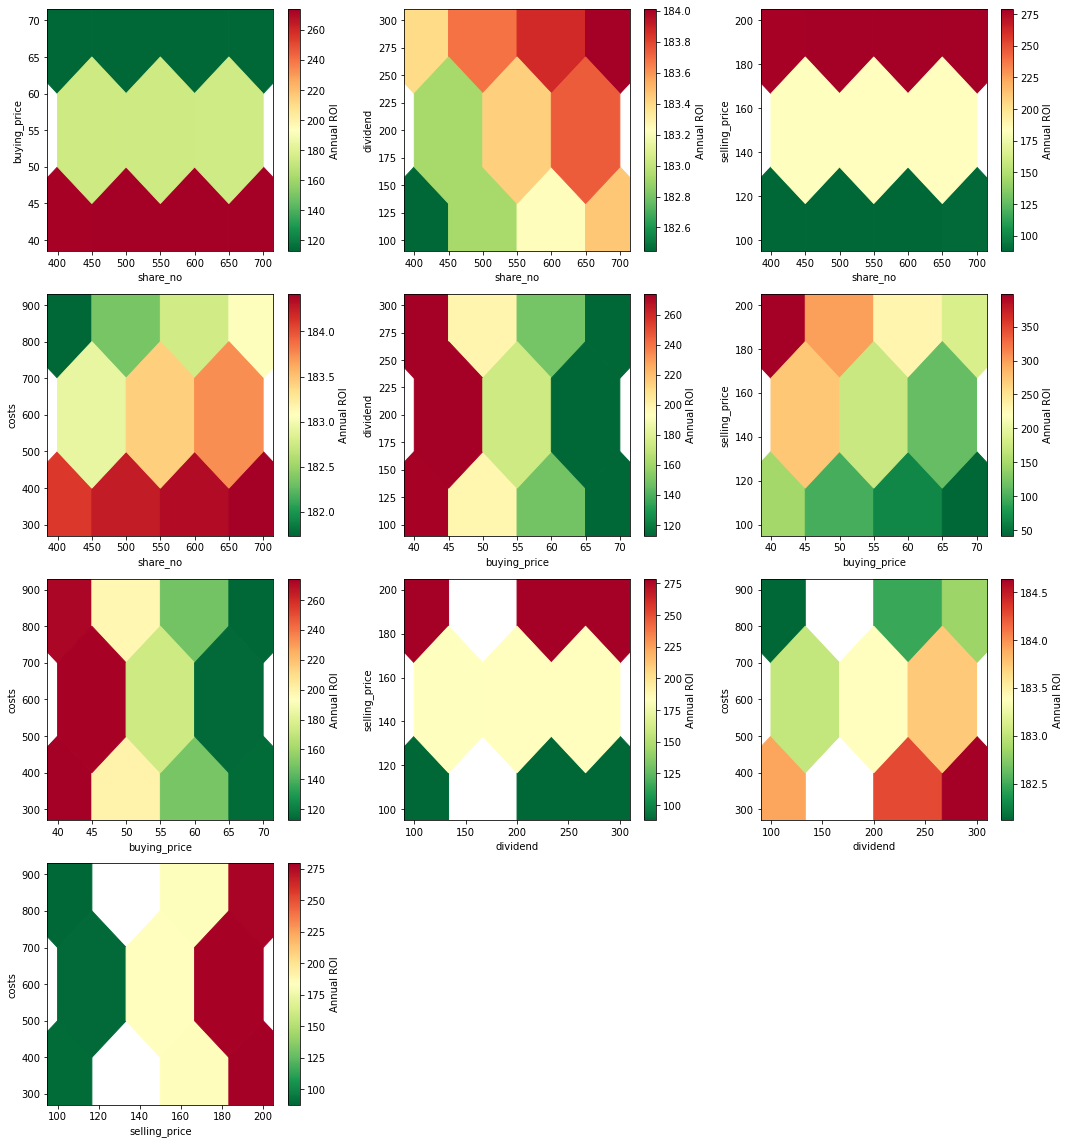

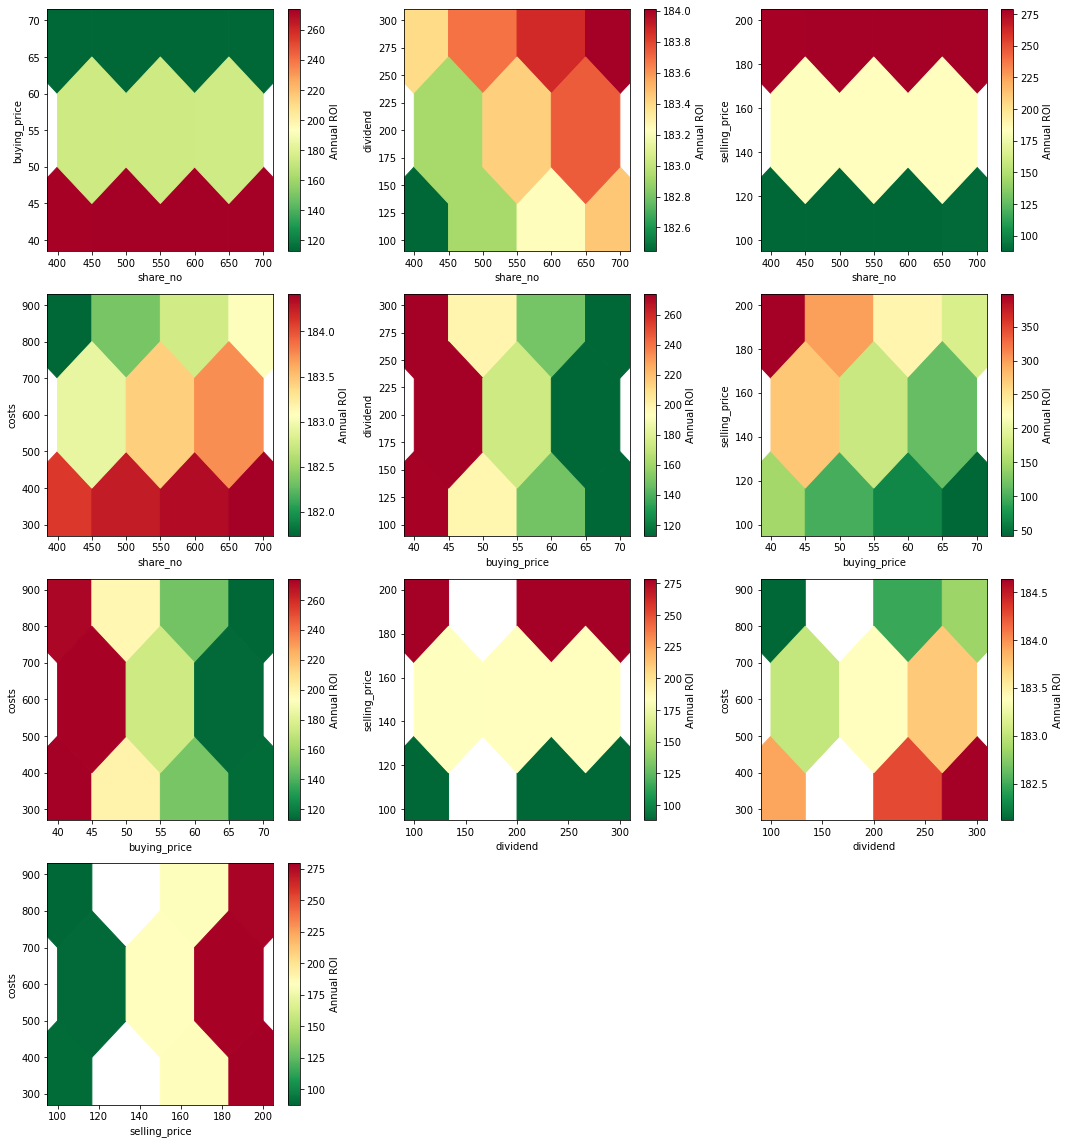

In [26]:
# Create a visualisation.
sa.plot()

In [27]:
# Display results as a DataFrame.
sa.styled_dfs()

,40,50,60,70
share_no,,,,
400,272.500000,198.000000,148.333333,112.857143
500,273.000000,198.400000,148.666667,113.142857
600,273.333333,198.666667,148.888889,113.333333
700,273.571429,198.857143,149.047619,113.469388


,100,200,300
share_no,,,
400,182.447917,182.922619,183.397321
500,182.922619,183.302381,183.682143
600,183.239087,183.555556,183.872024
700,183.465136,183.736395,184.007653


,100,150,200
share_no,,,
400,87.982143,182.922619,277.863095
500,88.361905,183.302381,278.242857
600,88.615079,183.555556,278.496032
700,88.795918,183.736395,278.676871


,300,400,500,600,700,800,900
share_no,,,,,,,
400,184.346726,183.872024,183.397321,182.922619,182.447917,181.973214,181.498512
500,184.441667,184.061905,183.682143,183.302381,182.922619,182.542857,182.163095
600,184.504960,184.188492,183.872024,183.555556,183.239087,182.922619,182.606151
700,184.550170,184.278912,184.007653,183.736395,183.465136,183.193878,182.922619


,100,200,300
buying_price,,,
40,272.626488,273.101190,273.575893
50,198.101190,198.480952,198.860714
60,148.417659,148.734127,149.050595
70,112.929422,113.200680,113.471939


,100,150,200
buying_price,,,
40,148.101190,273.101190,398.101190
50,98.480952,198.480952,298.480952
60,65.400794,148.734127,232.067460
70,41.772109,113.200680,184.629252


,300,400,500,600,700,800,900
buying_price,,,,,,,
40,274.525298,274.050595,273.575893,273.101190,272.626488,272.151786,271.677083
50,199.620238,199.240476,198.860714,198.480952,198.101190,197.721429,197.341667
60,149.683532,149.367063,149.050595,148.734127,148.417659,148.101190,147.784722
70,114.014456,113.743197,113.471939,113.200680,112.929422,112.658163,112.386905


,100,150,200
dividend,,,
100,88.078214,183.018690,277.959166
200,88.438761,183.379238,278.319714
300,88.799309,183.739785,278.680261


,300,400,500,600,700,800,900
dividend,,,,,,,
100,184.100333,183.739785,183.379238,183.018690,182.658142,182.297594,181.937046
200,184.460881,184.100333,183.739785,183.379238,183.018690,182.658142,182.297594
300,184.821429,184.460881,184.100333,183.739785,183.379238,183.018690,182.658142


,300,400,500,600,700,800,900
selling_price,,,,,,,
100,89.520405,89.159857,88.799309,88.438761,88.078214,87.717666,87.357118
150,184.460881,184.100333,183.739785,183.379238,183.018690,182.658142,182.297594
200,279.401357,279.040809,278.680261,278.319714,277.959166,277.598618,277.238070


{('share_no',
  'buying_price'): <pandas.io.formats.style.Styler at 0x7fbf110ce040>,
 ('share_no', 'dividend'): <pandas.io.formats.style.Styler at 0x7fbed0af09a0>,
 ('share_no',
  'selling_price'): <pandas.io.formats.style.Styler at 0x7fbed0ae3eb0>,
 ('share_no', 'costs'): <pandas.io.formats.style.Styler at 0x7fbed0b16790>,
 ('buying_price',
  'dividend'): <pandas.io.formats.style.Styler at 0x7fbed0ae5cd0>,
 ('buying_price',
  'selling_price'): <pandas.io.formats.style.Styler at 0x7fbed0b00c40>,
 ('buying_price', 'costs'): <pandas.io.formats.style.Styler at 0x7fbed0aea5e0>,
 ('dividend',
  'selling_price'): <pandas.io.formats.style.Styler at 0x7fbef838e7c0>,
 ('dividend', 'costs'): <pandas.io.formats.style.Styler at 0x7fbf10e99310>,
 ('selling_price',
  'costs'): <pandas.io.formats.style.Styler at 0x7fbee0f4bee0>}

## 8. Identify best-case investment scenario

In [28]:
@dataclass
class ModelInputs:
    share_no : int = 600
    buying_price: int = 20
    dividend: int = 800
    selling_price: int = 22
    costs: int = 100
        
model_data = ModelInputs()
model_data

ModelInputs(share_no=600, buying_price=20, dividend=800, selling_price=22, costs=100)

In [29]:
def annualized_roi_per_year_for_required_roi(data: ModelInputs):
    year = 0
    prior_roi = 0
    
    for year in range(19):
        year = year + 1        
        net_return = (data.selling_price - data.buying_price) * data.share_no + data.dividend - data.costs
        cost_of_investment = data.buying_price * data.share_no

        roi = prior_roi + ((net_return)/(cost_of_investment))*100 
        annual_roi = ((1 + (roi/100))**(1/year)-1)*100
        
        prior_roi = roi 
    print(f'The annualized ROI at year {year} reaches {annual_roi}% for total shares of {model_data.share_no}\
    with a buying price of {model_data.buying_price}, selling price of {model_data.selling_price}')
    
annualized_roi_per_year_for_required_roi(model_data)

The annualized ROI at year 19 reaches 7.580841850996478% for total shares of 600    with a buying price of 20, selling price of 22
